https://github.com/pytorch/examples/tree/master/mnist

# PyTorch Data Preprocess

In [1]:
import torch

from torchvision import datasets, transforms

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음

In [2]:
batch_size = 32# batch_size를 data loader에다가 직접 넣어줘
test_batch_size = 32

In [4]:
# 데이터 불러올 때 이렇게하라고 PyTorch에서 딱 명시해줬음!
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5,), std=(0.5,))
                  ])),
    batch_size=batch_size,
    shuffle=True)
# datasets.MNIST('directory', 학습용도로, 없으면 다운받음(앞에서 만들어준 directory에),
# transform-normalize(평균과 std를 0.5로 줄 것이라는 말))

In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,), (0.5,))
                  ])),
    batch_size=test_batch_size,
    shuffle=True)

### 첫번재 iteration에서 나오는 데이터 확인

In [6]:
images, labels = next(iter(train_loader))
# next(iter(train_loader)) : train_loader에 있는 gererator를 한번 iteration한 다음에 첫번째를 가져오는 것

In [7]:
images.shape
# Tensor에서는 (batch_size, height, width, channel)이었다면
# Pytorch에서는 (batch_size, channel, height, width) !!
# 그럼 RBG였다면 ([32, 3, 28, 28]) 이었겠지

torch.Size([32, 1, 28, 28])

In [8]:
labels.shape

torch.Size([32])

PyTorch는 TensorFlow와 다르게 **[Batch Size, Channel, Height, Width]** 임을 명시해야함

### 데이터 시각화

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
images[0].shape # 32개 중 맨 첫번째 것

torch.Size([1, 28, 28])

In [11]:
torch_image = torch.squeeze(images[0]) # squeeze():차원의 원소가 1인 차원을 없애(차원 줄이기) <-> unsqueeze())
torch_image.shape

torch.Size([28, 28])

In [12]:
image = torch_image.numpy() # numpy화
image.shape

(28, 28)

In [13]:
label = labels[0].numpy()

In [14]:
label

array(5, dtype=int64)

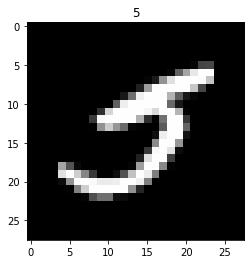

In [15]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()